3.23 lc union-find并查集  or DFS

Time complexity: O(N+E)


Space complexity: O(N)

In [1]:
from typing import List

In [ ]:
# time exceed limit
class Solution:

    count = 0
    parent = []
    size = []
    
    def find(self,i):
        while self.parent[i] != i:
            self.parent[i] = self.parent[self.parent[i]]
        return self.parent[i]

    def union(self,i,j):
        rooti = self.find(i)
        rootj = self.find(j)
        if rooti == rootj:
            return
        if self.size[rooti] < self.size[rootj]:
            self.parent[rootj] = rooti
            self.size[rooti] += self.size[rootj]
        else:
            self.parent[rooti] = rootj
            self.size[rootj] += self.size[rooti]
        self.count -= 1

    def makeConnected(self, n: int, connections: List[List[int]]) -> int:
        self.parent = [i for i in range(n+1)]
        self.size = [1 for _ in range(n+1)]
        self.count = n

        for [i,j] in connections:
            self.union(i,j)

        numReorder = self.count - 1
        return numReorder
        

In [ ]:
##法2.DFS 47.5%
class Solution:
    def makeConnected(self, n, connections):

        if len(connections) < n-1:
            return -1
        
        graph = [set() for i in range(n)]
        for u, v in connections:
            #bidirectional edges
            graph[u].add(v)
            graph[v].add(u)
        
        visited = [0] * n

        def dfs(node):
            if visited[node]:
                return 0
            visited[node] = 1
            for neighbor in graph[node]:
                dfs(neighbor)
            return 1

        #对所有node都dfs，
        #注意，只有本node 不在visited里时，return的1会被sum进去
        return sum(dfs(node) for node in range(n))  -1

In [3]:
#优化1.0  union return 1, 随时减   runtime 5%

class Solution:

    count = 0
    parent = []
    size = []
    
    def find(self,i):
        while self.parent[i] != i:
            i = self.parent[self.parent[i]]
        return i

    def union(self,i,j):
        rooti = self.find(i)
        rootj = self.find(j)
        if rooti == rootj:
            return
        if self.size[rooti] < self.size[rootj]:
            self.parent[rootj] = rooti
            self.size[rooti] += self.size[rootj]
        else:
            self.parent[rooti] = rootj
            self.size[rootj] += self.size[rooti]
        self.count -= 1
        return

    def makeConnected(self, n: int, connections: List[List[int]]) -> int:
        
        # special case: NOT ENOUGH CABLES
        if n-1 > len(connections):
            return -1
        
        self.parent = [i for i in range(n+1)]
        self.size = [1 for _ in range(n+1)]
        self.count = n

        for [i,j] in connections:
            self.union(i,j)

        numReorder = self.count - 1
        return numReorder
        

1
2
3
4


In [ ]:
#优化2.0  rank instead of size   runtime 5.72%

class Solution:

    parent = []
    rank = []
    
    def find(self,i):
        while self.parent[i] != i:
            i = self.parent[self.parent[i]]
        return i

    def union(self,i,j)->int:
        rooti = self.find(i)
        rootj = self.find(j)
        if rooti == rootj:
            return 0
        if self.rank[rooti] < self.rank[rootj]:
            self.parent[rootj] = rooti
        elif self.rank[rooti] > self.rank[rootj]:
            self.parent[rootj] = rooti
        else:
            self.parent[rootj] = rooti
            self.rank[rooti] +=1
        return 1

    def makeConnected(self, n: int, connections: List[List[int]]) -> int:
        
        # special case: NOT ENOUGH CABLES
        if n-1 > len(connections):
            return -1
        
        self.parent = [i for i in range(n+1)]
        self.rank = [0 for _ in range(n+1)]
        count = n

        for [i,j] in connections:
            count -= self.union(i,j)

        return count-1
        

In [ ]:
#优化3.0  parent/rank不是Solution的attribute，改成函数传递   runtime 8.51%

class Solution:

    def find(self,parent,i):
        # while parent[i] != i:
        #     i = parent[parent[i]]
        # return i
        while parent[n] != n:
            parent[n] = parent[parent[n]]
            n = parent[n]
        return n #这种写法超快

    def union(self,parent, rank, i,j)->int:
        rooti = self.find(parent,i)
        rootj = self.find(parent,j)
        if rooti == rootj:
            return 0
        if rank[rooti] < rank[rootj]:
            parent[rootj] = rooti
        elif rank[rooti] > rank[rootj]:
            parent[rootj] = rooti
        else:
            parent[rootj] = rooti
            rank[rooti] +=1
        return 1

    def makeConnected(self, n: int, connections: List[List[int]]) -> int:
        
        # special case: NOT ENOUGH CABLES
        if n-1 > len(connections):
            return -1
        
        parent = [i for i in range(n+1)]
        rank = [0 for _ in range(n+1)]
        count = n

        for [i,j] in connections:
            count -= self.union(parent, rank, i,j)

        return count-1
        

In [ ]:
#优化3.0  find union函数定义在内部，parent/rank变成global attribute不用copy传递   
#runtime 8.77%

class Solution:


    def makeConnected(self, n: int, connections: List[List[int]]) -> int:
        
        # special case: NOT ENOUGH CABLES
        if n-1 > len(connections):
            return -1
        
        parent = [i for i in range(n+1)]
        rank = [0 for _ in range(n+1)]
        count = n

        def find(i):
            while parent[i] != i:
                i = parent[parent[i]]
            return i

        def union(i,j)->int:
            rooti = find(i)
            rootj = find(j)
            if rooti == rootj:
                return 0
            if rank[rooti] < rank[rootj]:
                parent[rootj] = rooti
            elif rank[rooti] > rank[rootj]:
                parent[rootj] = rooti
            else:
                parent[rootj] = rooti
                rank[rooti] +=1
            return 1

        for [i,j] in connections:
            count -= union(i,j)

        return count-1
        

There are n computers numbered from 0 to n - 1 connected by ethernet cables connections forming a network where connections[i] = [ai, bi] represents a connection between computers ai and bi. Any computer can reach any other computer directly or indirectly through the network.

You are given an initial computer network connections. You can extract certain cables between two directly connected computers, and place them between any pair of disconnected computers to make them directly connected.

Return the minimum number of times you need to do this in order to make all the computers connected. If it is not possible, return -1.

 

Example 1:
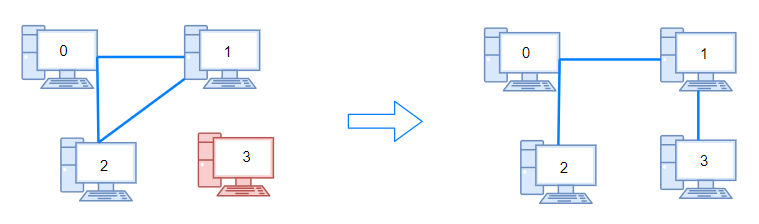 </br>

Input: n = 4, connections = [[0,1],[0,2],[1,2]]
Output: 1
Explanation: Remove cable between computer 1 and 2 and place between computers 1 and 3.


Example 2:
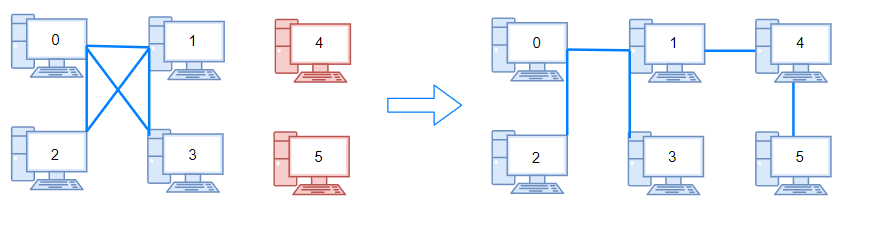 </br>

Input: n = 6, connections = [[0,1],[0,2],[0,3],[1,2],[1,3]]
Output: 2


Example 3:

Input: n = 6, connections = [[0,1],[0,2],[0,3],[1,2]]
Output: -1
Explanation: There are not enough cables.
 

Constraints:

1 <= n <= 105
1 <= connections.length <= min(n * (n - 1) / 2, 105)
connections[i].length == 2
0 <= ai, bi < n
ai != bi
There are no repeated connections.
No two computers are connected by more than one cable.